# Data analysis and augmentation
The idea of this notebook is to load all the labelled data and check the distribution of all classes. For all the classes which have less number of samples, the idea is to use data augmentation (both text and image) and boost the number of samples so that all classes have equal number of samples. 

In [1]:
import json

with open('products_with_labels.json') as f:
    data = json.loads(f.read())

In [2]:
from collections import defaultdict

classes = defaultdict(int)

for product in data:
    classes[product['label']] += 1
    

In [3]:
print(classes)

defaultdict(<class 'int'>, {'Dresses': 14, 'Tops': 75, 'Others': 53, 'Shoes': 17, 'Intimates': 16, 'Bags': 10, 'Swimwear': 19, 'Jeans': 26, 'Jewelry': 24, 'Skirts': 3, 'Rompers': 7})


In [4]:
import re
from nltk import sent_tokenize
from random import shuffle
from torchvision import transforms
import PIL

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

def text_preprocess(description):
    return cleanhtml(description)

def text_augmentation(description):
    sents = sent_tokenize(description)
    new_sents = []
    for each in sents:
        new_sents.extend(each.split('\n'))
    shuffle(new_sents)
    return '\n'.join([x.strip() for x in new_sents])

def img_augmentation(image):
    transform = transforms.RandomOrder([
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(20),
        transforms.RandomVerticalFlip(p=0.1),
        transforms.ColorJitter(brightness=0.2, contrast=1, saturation=1)
    ])
    try:
        new_image = transform(image)
    except ValueError:
        return image
    return new_image

def gen_new_data_point(product):
    new_product = {}
    new_product['description'] = text_augmentation(text_preprocess(product['description']))
    new_product['image'] = img_augmentation(product['image'])
    new_product['label'] = product['label']
    return new_product

In [5]:
# Test text_preprocess
text="<meta charset=\"utf-8\">\n<div>The style is made from our newest gauze fabric, which is less sheer, but still so soft and natural.\u00a0</div>\n<br>\n<div></div>\n<ul>\n<li>100% Cotton</li>\n<li>Made in USA</li>\n<li>Hand Wash Only</li>\n<li>Unfinished hem</li>\n<li>Model is 5' 8.5\"</li>\n</ul>"
print(text_preprocess(text))


The style is made from our newest gauze fabric, which is less sheer, but still so soft and natural. 



100% Cotton
Made in USA
Hand Wash Only
Unfinished hem
Model is 5' 8.5"



In [6]:
print(text_augmentation(text_preprocess(text)))

Model is 5' 8.5"
Hand Wash Only

100% Cotton
Made in USA
The style is made from our newest gauze fabric, which is less sheer, but still so soft and natural.
Unfinished hem


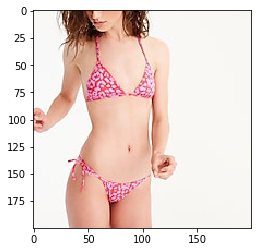

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image = './images/hgwlwb.jpeg'
pil_im = PIL.Image.open(image)
plt.figure()
plt.imshow(np.asarray(pil_im))
plt.show()

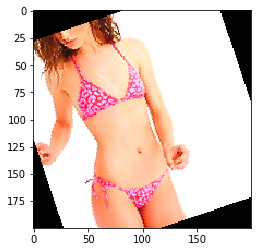

In [8]:
plt.imshow(img_augmentation(pil_im))

In [9]:
min_sample_count = 100

In [10]:
classes = defaultdict(list)
for product in data:
    new_product = {}
    img = PIL.Image.open(product['image_file'])
    new_product['image'] = img.copy()
    img.close()
    new_product['label'] = product['label']
    new_product['description'] = text_preprocess(product['description'])
    classes[new_product['label']].append(new_product)

In [11]:
keys = list(classes.keys())

In [12]:
from random import choice

for key in keys:
    images_copy = classes[key][:]
    while len(classes[key]) != min_sample_count:
        p = choice(images_copy)
        classes[key].append(gen_new_data_point(p))

In [13]:
for key in keys:
    print(len(classes[key]))

100
100
100
100
100
100
100
100
100
100
100


In [14]:
classes.keys()

dict_keys(['Dresses', 'Tops', 'Others', 'Shoes', 'Intimates', 'Bags', 'Swimwear', 'Jeans', 'Jewelry', 'Skirts', 'Rompers'])

Falls to knee, 41 1/4 from high point of shoulder.
Select stores.
Import.
What makes it so super is the measure of the fiber: the higher the number, the finer the fiber, and 120 is one of the finest, with a silky-smooth finish and a refined look.
A feminine sheath dress in our super 120s wool.
Dry clean.
Wool.


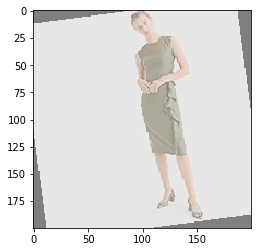


Shop the Women's Tie Shoulder Dress In Gingham at J.Crew and see the entire selection of Women's Swim.
Free Shipping Available.


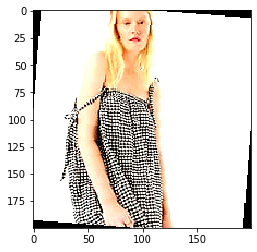


Free Shipping Available.
Shop the Women's Tie Shoulder Dress In Gingham at J.Crew and see the entire selection of Women's Swim.


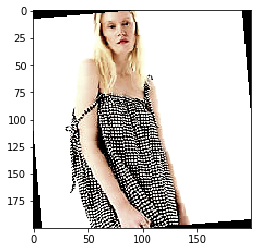


Shop the Women's Tie Shoulder Dress In Gingham at J.Crew and see the entire selection of Women's Swim.
Free Shipping Available.


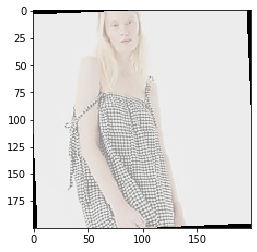


Model is wearing size 2
Model's Height: 5'9"
Style Number: S18117JA
Size &amp; Fit
Washing Instructions: Dry Clean Only
*If you do not see your size available, please contact customerservice@adamlippes.com and we will do our best to locate the item for you.
Composition: 51% ACETATE 33% SILK 13% POLYESTER 3% POLYMETALLIC
Thank you.
Description
Measurements: item fits true to size

Composition &amp; Care


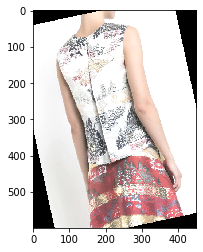


Import.
Weddings and weekends (and everything in between), say hello to the easiest maxi dress yet.
Bonus: the pretty floral print will make this a springtime favorite.
Machine wash.
Falls below knee.
Poly.
Made from a crinkly chiffon blend fabric, it's not only super flattering, it's incredibly comfy too.


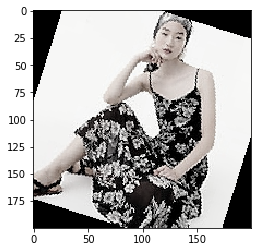


What makes it so super is the measure of the fiber: the higher the number, the finer the fiber, and 120 is one of the finest, with a silky-smooth finish and a refined look.
A feminine sheath dress in our super 120s wool.
Falls to knee, 41 1/4 from high point of shoulder.
Import.
Dry clean.
Select stores.
Wool.


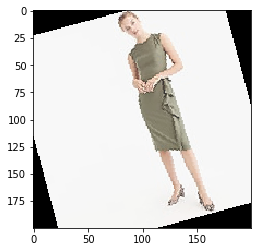


What makes it so super is the measure of the fiber: the higher the number, the finer the fiber, and 120 is one of the finest, with a silky-smooth finish and a refined look.
Wool.
Dry clean.
Import.
A feminine sheath dress in our super 120s wool.
Select stores.
Falls to knee, 41 1/4 from high point of shoulder.


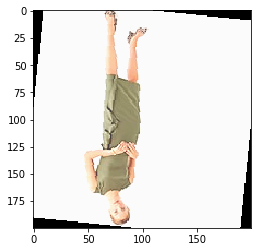


Shop the Girls' Girls' Silk Bow-Back Dress at J.Crew and see the entire selection of Girls' Dresses.
Free Shipping Available.


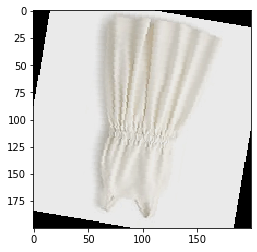


Shop the Women's Tall Bell-Sleeve Sheath In Stretch Ponte at J.Crew and see the entire selection of Women's Dresses.
Free Shipping Available.


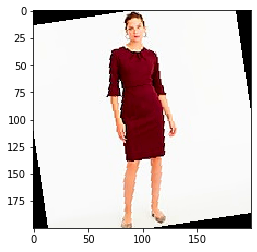

In [15]:
for i in range(10):
    p = choice(classes['Dresses'])
    print(p['description'])
    plt.imshow(np.asarray(p['image']))
    plt.show()
    input()

In [16]:
import pickle

augmented_data = []
for key in keys:
    augmented_data.extend(classes[key])
    
with open('augmented_data.p', 'wb') as f:
    pickle.dump(augmented_data, f)

In [17]:

print('length of total dataset now - {}'.format(len(augmented_data)))

length of total dataset now - 1100
